**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Importing Data**

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data (3).csv


In [ ]:
dt=pd.read_csv('Salary_Data.csv')

In [ ]:
dt

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
dt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
dt.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**Data Cleaning Steps**

**Duplicate rows**

In [ ]:
dt.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [ ]:
dt[dt.duplicated()].shape

(0, 2)

In [ ]:
dt[dt.duplicated()]

,YearsExperience,Salary


**Missing Values**

In [ ]:
dt.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
dt.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**Outlier Detection**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


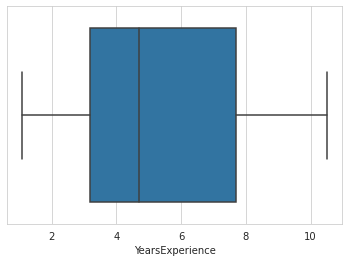

In [ ]:
sns.boxplot(dt['YearsExperience'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


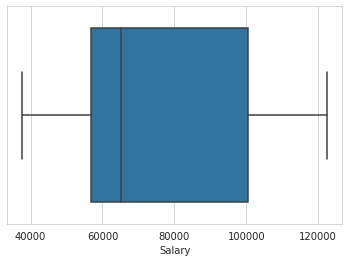

In [ ]:
sns.boxplot(dt['Salary'])

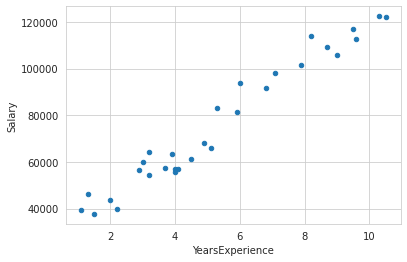

In [ ]:
dt.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.show()

**Correlation**

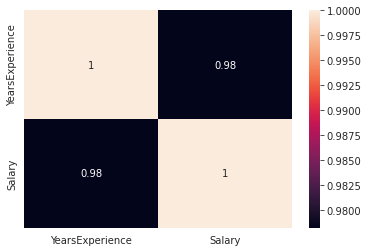

In [ ]:
sns.heatmap(dt.corr(),annot=True)

In [ ]:
dt.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Observation**: From the above data we can observe that the data is positively co-related and it is linear.

**Splitting the Data into Train and Test Data**

In [ ]:
x=dt.iloc[:,0].values.reshape(-1,1)
y=dt.iloc[:,1].values

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Building the Model and Fitting the Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

print('Training Complete')


Training Complete


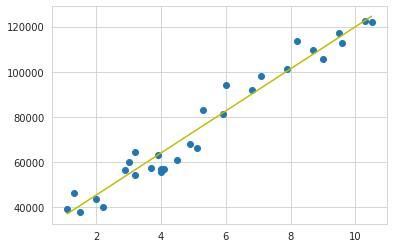

In [ ]:
#plotting the regression line

line = model.coef_ * x + model.intercept_
#y=mx+c

#plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, 'y')
plt.show()


**Predicted Values of X Test**

In [ ]:
#Print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test)
y_pred


array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
#Comparing Actual vs Predicted
data=pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})
data

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


**Predicting the value given from input**





In [ ]:
YearsExperience = 5.5
own_pred= model.predict([[YearsExperience]])
print("If the Years of Experience is = {}" . format(YearsExperience))
print("Predicted Salary = {}" . format(own_pred[0]))

If the Years of Experience is = 5.5
Predicted Salary = 77999.26234763872


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('R_Squared Score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126549
R_Squared Score: 0.988169515729126


**OLS Technique**

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=dt).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        12:55:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.rsquared

0.9569566641435086

**Log Transformation**

In [ ]:
dt_log=dt.rename(columns={'YearsExperience':'Exp'})

In [ ]:
dt_log.head()

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
model_log = smf.ols('np.log(Salary)~np.log(Exp)',data=dt_log).fit() 

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        12:55:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.rsquared

0.9569566641435086

**Influence Plot**

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=dt).fit()

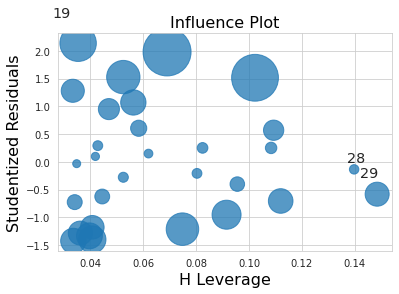

In [ ]:
influence_plot(model)
plt.show()

**Applying Cooks Distance**

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance   

<ipython-input-190-4962e4810346>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(dt)), np.round(c, 3))


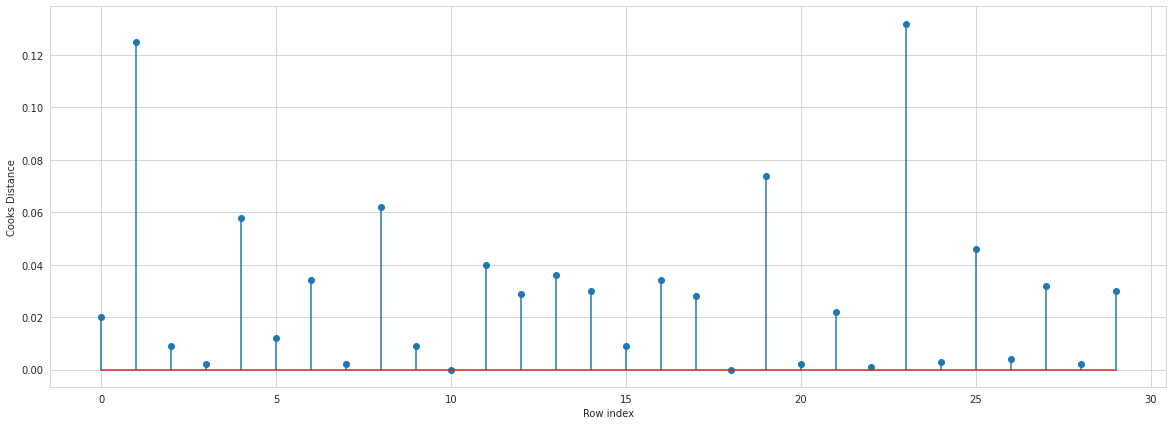

In [ ]:
#Plot the influencers values using stem plot
sns.set_style('whitegrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(23, 0.13175452313135258)

In [ ]:
dt1=dt.drop(dt.index[[23,1,19]], axis=0).reset_index()

In [ ]:
dt1

,index,YearsExperience,Salary
0,0,1.1,39343.0
1,2,1.5,37731.0
2,3,2.0,43525.0
3,4,2.2,39891.0
4,5,2.9,56642.0
5,6,3.0,60150.0
6,7,3.2,54445.0
7,8,3.2,64445.0
8,9,3.7,57189.0
9,10,3.9,63218.0


In [ ]:
model=smf.ols('Salary~YearsExperience',data=dt1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     776.9
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.39e-20
Time:                        13:00:57   Log-Likelihood:                -266.60
No. Observations:                  27   AIC:                             537.2
Df Residuals:                      25   BIC:                             539.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.481e+04   2032.648     12.205      0.000    2.06e+04     2.9e+04
YearsExperience  9425.2902    338.154     27.873      0.000    8728.849    1.01e+04
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.169
Skew:                           0.248   Prob(JB):                        0.557
Kurtosis:                       2.110   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.rsquared

0.9688236828846021

**OBSERVATION:**

From the given data set by using cooks distance and applying transformation we got accuracy of 96%